In [36]:
from pytesseract import pytesseract
import cv2
import numpy as np
from typing import List, Tuple
import matplotlib.pyplot as plt
from PIL import Image
import os.path
from os import path
import glob
import sys
#pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

In [37]:
# scipts from scrips folder
import pandas as pd
sys.path.append('../scripts')
from text_extraction import Text_Extraction

In [38]:
# reading whole asset data
list_assets = glob.glob('../data/Assets/*')
list_assets[0:5]

['../data/Assets/002dbbd85ef3fe6a2e7d0754fb9f9a1a',
 '../data/Assets/02d99db5aa9193b2bfc98ad6998e0ea7',
 '../data/Assets/0a22f881b77f00220f2034c21a18b854',
 '../data/Assets/00dfe88c4d3fb60793765d314bf24b7c',
 '../data/Assets/0b1ee11406e97cc6fb4229deeb19e6b7']

#### Extracting text from  image

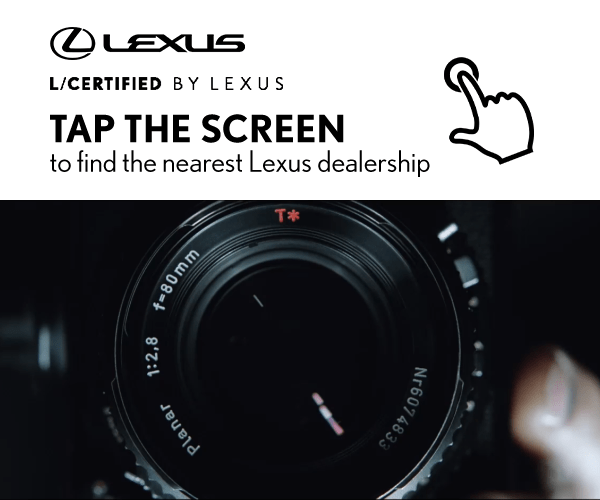

In [22]:
#Reading single data from specific asset#
path = "../data/Assets/0a22f881b77f00220f2034c21a18b854/_preview.png"
Image.open(path)

In [51]:
# initializing class from scrips folder
txtextract =Text_Extraction()
# creating empty dictinary
lists_text =[]
image='_preview.png'
for ls in list_assets:
    if path.exists(ls+'/'+image):
        text_value=txtextract.extract_text(ls+'/'+image, r'/usr/bin/tesseract')
        lists_text.append([ls.split('/')[-1],text_value])


In [54]:
# creating dataframe with its game_Id
txt_data = pd.DataFrame(lists_text, columns=['game_Id','Full_Text'])

In [55]:
# To Dispaly Extracted Txt
txt_data.head()

game_Id  \
0  002dbbd85ef3fe6a2e7d0754fb9f9a1a   
1  02d99db5aa9193b2bfc98ad6998e0ea7   
2  0a22f881b77f00220f2034c21a18b854   
3  00dfe88c4d3fb60793765d314bf24b7c   
4  0b1ee11406e97cc6fb4229deeb19e6b7   

                                           Full_Text  
0                                                  
  
1  Ovexus\nL/CERTIFIED BY LEXUS\n\nTAP THE SCREEN...  
2  Ovexus\nL/CERTIFIED BY LEXUS\n\nTAP THE SCREEN...  
3                                                  
  
4       VLR\ner LM\n\nvon ee nb\nTILE BTTONG\n\n \n

In [58]:
# replacing any characters based on the below pattern
txt_data.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)
# adding some features
txt_data['Txt_char_lenght'] = txt_data['Full_Text'].str.len()
txt_data['Txt_Word_length'] = txt_data['Full_Text'].str.split().str.len()

In [59]:
txt_data.shape

(8, 4)

In [66]:
txt_data.head(8)

game_Id  \
0  002dbbd85ef3fe6a2e7d0754fb9f9a1a   
1  02d99db5aa9193b2bfc98ad6998e0ea7   
2  0a22f881b77f00220f2034c21a18b854   
3  00dfe88c4d3fb60793765d314bf24b7c   
4  0b1ee11406e97cc6fb4229deeb19e6b7   
5  0a18978cdc8b64f900b0db6a297eb99d   
6  0aeb1ee8a72ad3c5566cf7a2885dc39b   
7  0a59be2e7dd53d6de11a10ce3649c081   

                                           Full_Text  Txt_char_lenght  \
0                                                  
                1   
1  OvexusL/CERTIFIED BY LEXUSTAP THE SCREENto fin...               78   
2  OvexusL/CERTIFIED BY LEXUSTAP THE SCREENto fin...               78   
3                                                  
                1   
4                     VLRer LMvon ee nbTILE BTTONG 
               30   
5  |   Lexis FeScrub the screenTo train for more ...               59   
6                                                  
                2   
7  OvexusL/CERTIFIED BY LEXUSTAP THE SCREENto fin...               80   

   Txt_Word_length  
0                0  
1               10  
2               10  
3                0  
4                5  
5                9  
6                0  
7               10

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Txt_char_lenght', ylabel='count'>

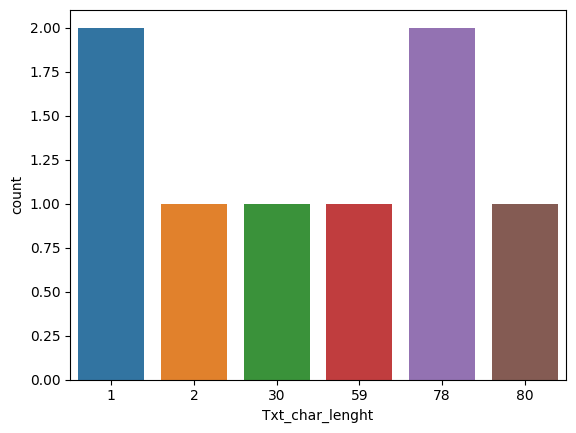

In [65]:
#Count Plot
sns.countplot(x="Txt_char_lenght", data=txt_data)

In [61]:
#To save extracted text
txt_data.to_csv('../data/extracted_features.csv', index = False)
